In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Read the loan.csv file and check the number of rows and columns.

In [52]:
loan=pd.read_csv('loan.csv')

In [53]:
loan.shape

(39717, 111)

Seperate the columns that are object type(non numeric values) as we need to look into these columns independently and do the cleaning part. Since there can be null values present or charecters like '%' attached to numbers also make these columns object type.

In [54]:
loan.select_dtypes('object').columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'application_type'],
      dtype='object')

Remove all the columns which have only NAN(null) values. 

In [55]:
loan=loan.dropna(axis=1,how='all')

In [56]:
# check again how many number of columns are there
loan.shape

(39717, 57)

Run nunique method on the loan dataset and see how many unique values are existing for each column.

In [57]:
loan.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

As we can see that in some columns have only one unique value we can drop these columns as they dont help in any further analysis. 

In [58]:
loan.drop(loan.nunique()[loan.nunique()==1].index,axis=1,inplace=True)

In [59]:
loan.shape

(39717, 48)

In [60]:
#run info() to identify if any column can be removed or needs to be modified
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

Drop Columns like member_id,emp title, desc,url,zip code as these are not numerical values and do not help much in any further analysis

In [61]:
loan.drop(labels=['desc','member_id','url','zip_code','emp_title'],axis=1,inplace=True)

In [62]:
loan.shape
loan.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


Lets remove % from int_rate and revol_util and also convert them to numeric values.
Also convert last_pymnt_amnt to numeric as all the values are integer values.

In [63]:
loan['int_rate']=loan.int_rate.apply(lambda x: (str(x))[:-1])
loan['revol_util']=loan.revol_util.apply(lambda x: (str(x))[:-1])
loan['int_rate']=loan.int_rate.apply(pd.to_numeric)
loan['last_pymnt_amnt']=loan.last_pymnt_amnt.apply(pd.to_numeric)

See how many null values are present in each columns

In [64]:
loan.isna().sum()

id                             0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
title                         11
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
out_prncp                      0
out_prncp_

Remove columns mths_since_last_delinq,mths_since_last_record,next_pymnt_d since majority values of these columns are null. So drop these columns

In [65]:
loan.drop(labels=['mths_since_last_delinq','mths_since_last_record','next_pymnt_d'],axis=1,inplace=True)

In [66]:
loan.isna().sum()

id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
title                        11
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_re

Now we will convert the emp_length to numerical value and fill the null values with 0.

Fill null values in pub_rec_bankruptcies to 'unknown' as there can be bankruptcies so filling them with 0 will impact our analysis

In [67]:
loan.emp_length.fillna('0',inplace=True)
loan.emp_length=(loan.emp_length.str.extract('(\d+)'))
loan.emp_length=loan.emp_length.apply(pd.to_numeric)

loan.pub_rec_bankruptcies.fillna('unknown',inplace=True)

In [68]:
print(loan.emp_length.dtype)
print(loan.emp_length.isna().sum())
print(loan.pub_rec_bankruptcies.isna().sum())
loan.head(5)

int64
0
0


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,OR,17.94,0,Jan-96,0,15,0,27783,53.90,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0


###Now we have completed the data cleaning
lets have a look at important columns like home_ownership, loan status , what is the purpose of taking loan ,verification status

In [69]:
loan.home_ownership.value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

###Observations-
With this we can see that at the time of taking loan most of the people houses are given for rent or in mortgage.

In [70]:
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

###Observations-
With the loan status we can observe that most of the loans are fully paid.

In [71]:
(loan.verification_status.value_counts()*100)/len(loan)

Not Verified       42.603923
Verified           32.250674
Source Verified    25.145404
Name: verification_status, dtype: float64

42% of the loans given are not verified.

In [72]:
(loan.purpose.value_counts()*100)/len(loan)

debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
house                  0.959287
vacation               0.959287
educational            0.818289
renewable_energy       0.259335
Name: purpose, dtype: float64

###Observations-
Most loans are for debt_consolidation.

#Removing Outliers

Remove extreme high or low values in columns which impact the analysis

In [73]:
loan.loan_amnt.describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

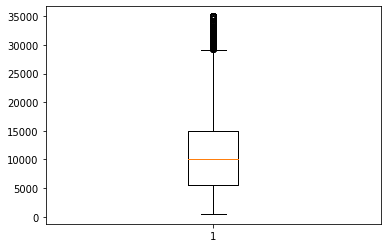

In [74]:
plt.boxplot(loan.loan_amnt)
plt.show()

### Observation-
Most of the loans are in between 5k and 15k

Analysis for Annual Income

In [75]:
loan.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

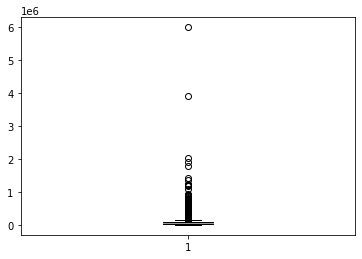

In [76]:
plt.boxplot(loan.annual_inc)
plt.show()

As we can see there are very high end values -outliers, this are impacting the overall analysis of the annual income,so lets remove the last 3%

count     38525.000000
mean      62934.562995
std       30448.312101
min        4000.000000
25%       40000.000000
50%       57300.000000
75%       80000.000000
max      165500.000000
Name: annual_inc, dtype: float64


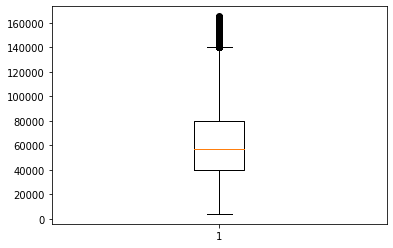

In [77]:
loan=loan[loan.annual_inc<=loan.annual_inc.quantile(0.97)]
print(loan.annual_inc.describe())
plt.boxplot(loan.annual_inc)
plt.show()

### Observations-
Most of the people who take loans their income range is between 40k and 77k.

In [78]:
loan.int_rate.describe()

count    38525.000000
mean        11.988065
std          3.708463
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

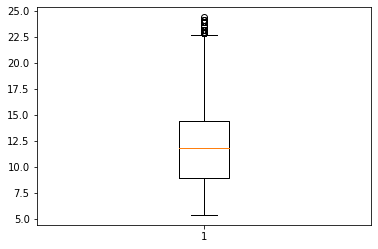

In [79]:
plt.boxplot(loan.int_rate)
plt.show()

###Observations-
The usual interest rate is between 8.5 to 15.

In [80]:
loan.total_pymnt.describe()

count    38525.000000
mean     11878.983420
std       8780.388102
min          0.000000
25%       5522.311630
50%       9698.593499
75%      16175.423210
max      58563.679930
Name: total_pymnt, dtype: float64

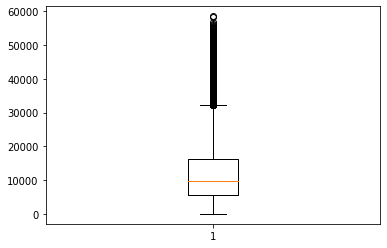

In [81]:
plt.boxplot(loan.total_pymnt)
plt.show()

#Univariate Analysis
Comapring loan_amt vs funded_amt vs funded_amt_inv

Text(0.5, 1.0, 'funded_amnt_inv')

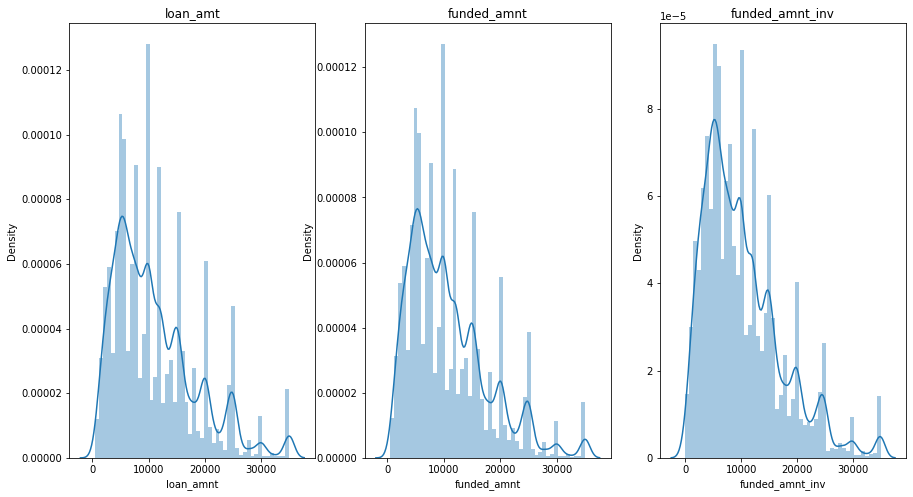

In [82]:
import warnings 
warnings.filterwarnings("ignore")
plt.figure(figsize=[15,8])
plt.subplot(1,3,1)
loan_amt=sns.distplot(loan.loan_amnt)
loan_amt.set_title("loan_amt")
plt.subplot(1,3,2)
funded_amnt=sns.distplot(loan.funded_amnt)
funded_amnt.set_title("funded_amnt")
plt.subplot(1,3,3)
funded_amnt_inv=sns.distplot(loan.funded_amnt_inv)
funded_amnt_inv.set_title("funded_amnt_inv")

###Observations---
With this we can conclude that there is no difference between loan amount to funded amount and funded amount invested. So we can drop funded amount and funded amount invested columns and use only loan amount column.

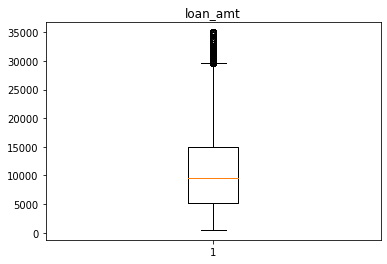

In [83]:
plt.title("loan_amt")
plt.boxplot(loan.loan_amnt)
plt.show()

###Observations-
we can conclude that most of the loans given are between 5000 and 15000

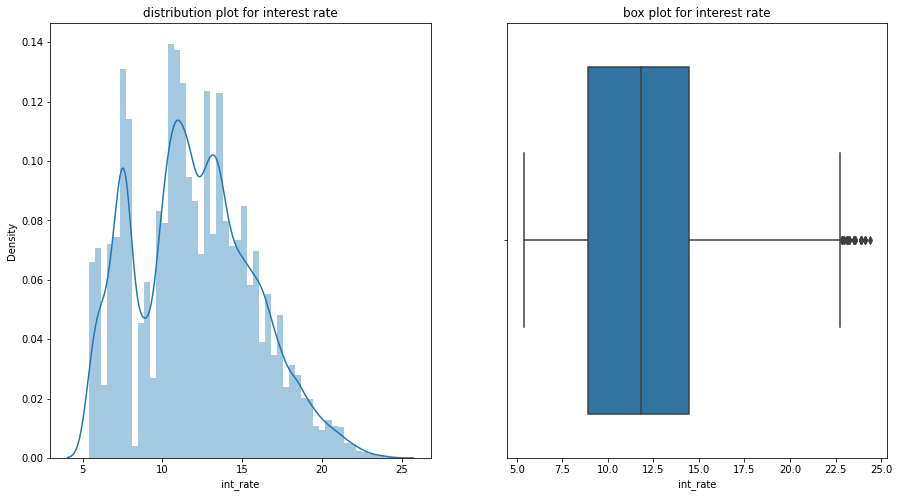

In [84]:
plt.figure(figsize=[15,8])
plt.subplot(1,2,1)
plt.title("distribution plot for interest rate")
sns.distplot(loan.int_rate)
plt.subplot(1,2,2)
plt.title("box plot for interest rate")
sns.boxplot(loan.int_rate)

##Observation:
Interest rate is between 10 and 15

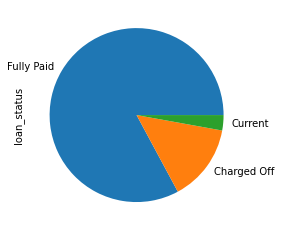

In [85]:
#Loan Status

loan.loan_status.value_counts().plot.pie()

observation: Majority of the loans are fully paid

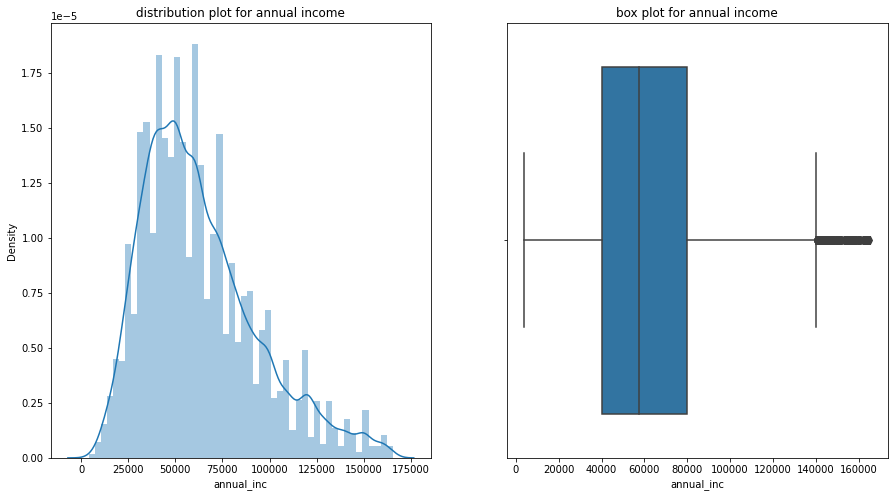

In [86]:
#Annual Income
plt.figure(figsize=[15,8])
plt.subplot(1,2,1)
plt.title("distribution plot for annual income")
sns.distplot(loan.annual_inc)
plt.subplot(1,2,2)
plt.title("box plot for annual income")
sns.boxplot(loan.annual_inc)

Observation: Burrowers income lies between 40k and 80k

#Segmented Univariate Analysis

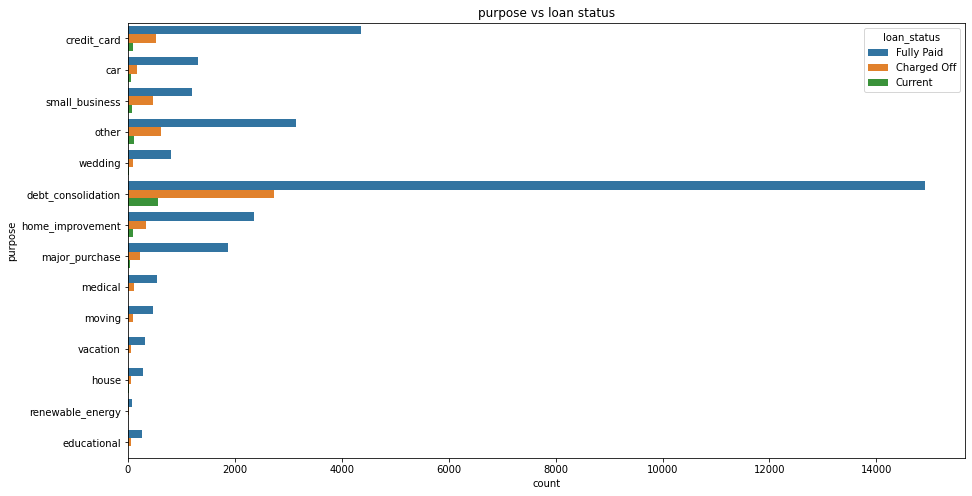

In [87]:
# Loan status vs purpose 
#earlier we saw that most of the loans were taken to clear credit card bills and debt purpose.Lets see the relation between 
#loan staus and purpose
plt.figure(figsize=[15,8])
plt.title("purpose vs loan status")
sns.countplot(y="purpose",hue="loan_status",data=loan)
plt.show()

###observation: 
We can see that most of the charged off are with debt_cosolidation and credit cards.
loans under renewable energy are least likely to be charged off
loans under house, educational and vacation are also least likely to be charged off

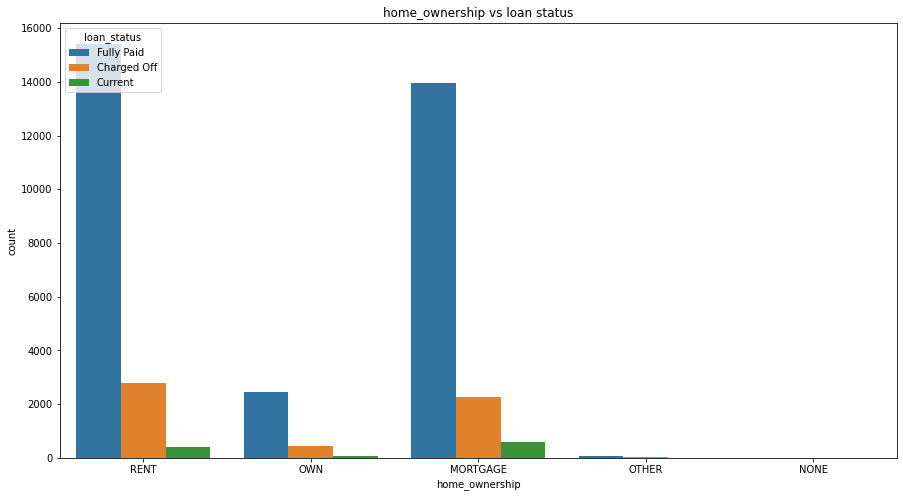

In [88]:
# Loan status vs home ownership 
#earlier we saw that house of most of the borrwere were in mortage or rented state.
plt.figure(figsize=[15,8])
plt.title("home_ownership vs loan status")
sns.countplot(x="home_ownership",hue="loan_status",data=loan)
plt.show()

###Observations
Most of the charged of accounts are where houses are in mortgage or in rent.
People having own house and not in mortage have very less chances of getting charged off.

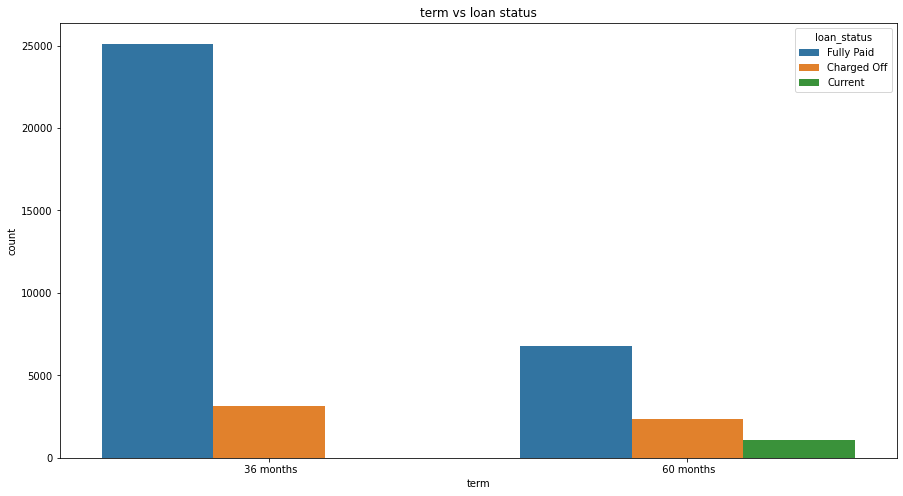

In [89]:
# Loan status vs loan paying terms 
#earlier we saw that house of most of the borrwere were in mortage or rented state.
plt.figure(figsize=[15,8])
plt.title("term vs loan status")
sns.countplot(x="term",hue="loan_status",data=loan)
plt.show()

###Observations
We can say that people whose term is for 60 months are more likely to charge off.

#Bivariate Analysis

In [90]:
#dropping columns funded_amt and funded_amnt_inv as we observed that there is no much difference in between these columns
loan.drop(labels=['funded_amnt','funded_amnt_inv'],axis=1,inplace=True)

In [91]:
loan_corr=loan.corr()
loan_corr.style.background_gradient(cmap='coolwarm', axis=None)

,id,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
id,1.000000,0.138540,0.075554,0.082616,0.095941,0.037883,0.097449,-0.009618,-0.042686,0.020632,-0.018078,0.009768,0.040807,0.180521,0.180490,0.135220,0.217423,0.107209,0.169135,-0.055494,0.034681,-0.012342,0.120730
loan_amnt,0.138540,1.000000,0.301514,0.929765,0.161511,0.412871,0.086467,-0.035568,0.001590,0.169418,-0.047689,0.314914,0.244273,0.196017,0.195688,0.883918,0.850794,0.847847,0.728433,0.044664,0.139192,0.074101,0.446500
int_rate,0.075554,0.301514,1.000000,0.276257,0.015089,0.065690,0.113503,0.155549,0.133441,0.001550,0.100610,0.086408,-0.056473,0.131882,0.131946,0.300575,0.296155,0.178336,0.526214,0.092464,0.121936,0.066380,0.151477
installment,0.082616,0.929765,0.276257,1.000000,0.132805,0.409539,0.074275,-0.023769,0.002229,0.164295,-0.043255,0.307643,0.217948,0.127140,0.126978,0.854262,0.813483,0.846690,0.633307,0.056171,0.121461,0.076906,0.398807
emp_length,0.095941,0.161511,0.015089,0.132805,1.000000,0.206116,0.056353,0.014322,0.008704,0.100863,0.050298,0.157605,0.204161,0.052393,0.052350,0.147170,0.155495,0.137176,0.131676,-0.016036,0.025083,0.005892,0.082603
annual_inc,0.037883,0.412871,0.065690,0.409539,0.206116,1.000000,-0.088344,0.031275,0.029268,0.264109,-0.017851,0.410718,0.382755,0.063354,0.063107,0.391445,0.376213,0.393398,0.278509,0.011272,0.044582,0.024991,0.220180
dti,0.097449,0.086467,0.113503,0.074275,0.056353,-0.088344,1.000000,-0.032564,0.005892,0.296499,-0.006022,0.258630,0.242797,0.039237,0.039164,0.084238,0.090918,0.060954,0.120431,-0.011581,0.024294,0.011384,0.015742
delinq_2yrs,-0.009618,-0.035568,0.155549,-0.023769,0.014322,0.031275,-0.032564,1.000000,0.008172,0.014156,0.007531,-0.060340,0.068764,-0.003689,-0.003904,-0.027254,-0.034172,-0.043163,0.019209,0.030530,0.012332,0.013779,-0.015184
inq_last_6mths,-0.042686,0.001590,0.133441,0.002229,0.008704,0.029268,0.005892,0.008172,1.000000,0.090895,0.026975,-0.027095,0.107750,-0.010697,-0.010361,-0.017432,-0.026684,-0.030797,0.017972,0.030679,0.018736,0.012428,0.024448
open_acc,0.020632,0.169418,0.001550,0.164295,0.100863,0.264109,0.296499,0.014156,0.090895,1.000000,0.003235,0.283890,0.684426,0.027960,0.027768,0.153150,0.143586,0.151551,0.115592,-0.017607,0.016937,0.005873,0.074412


###Observations-
we can see that total_pymnt ,total_pymnt_inv,total_rec_prncp,total_rec_int highly correlate with the loan amount

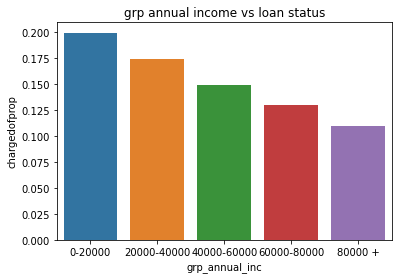

In [92]:
#lets see which range of income have more charged off members
#For this group the annual income into various ranges ad will plot a bar graph to identify
loan['grp_annual_inc'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])
annual_inc_to_chargedoff=loan.groupby(['grp_annual_inc','loan_status'])
annual_inc_to_chargedoff=annual_inc_to_chargedoff.loan_status.count()
#Now we have grouped the various income groups and we have loan status as sub rows in that colums..let us move them to separate columns
annual_inc_to_chargedoff=annual_inc_to_chargedoff.unstack()
annual_inc_to_chargedoff=annual_inc_to_chargedoff.reset_index()
annual_inc_to_chargedoff['chargedofprop']=annual_inc_to_chargedoff['Charged Off']/(annual_inc_to_chargedoff['Charged Off']+annual_inc_to_chargedoff['Current']+annual_inc_to_chargedoff['Fully Paid'])
#now lets plot a bar graph chargedofprop to grp_annual_inc
plt.title("grp annual income vs loan status")
sns.barplot(x='grp_annual_inc',y='chargedofprop',data=annual_inc_to_chargedoff)
plt.show()

###Observations--
We can see that low income grp people are most likely the charged off ones.  
With increasing in annual income the charged of ones also decrease.

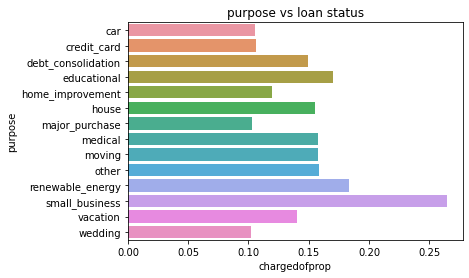

In [93]:
# Lets do the same analysis with pupose of taking loan
Purpose_of_loan_to_chargedoff=loan.groupby(['purpose','loan_status']).loan_status.count()
Purpose_of_loan_to_chargedoff=Purpose_of_loan_to_chargedoff.unstack()
#current loans of education has null values so fill the null values with 0
Purpose_of_loan_to_chargedoff=Purpose_of_loan_to_chargedoff.fillna(0)
Purpose_of_loan_to_chargedoff=Purpose_of_loan_to_chargedoff.reset_index()
Purpose_of_loan_to_chargedoff['chargedofprop']=Purpose_of_loan_to_chargedoff['Charged Off']/(Purpose_of_loan_to_chargedoff['Charged Off']+Purpose_of_loan_to_chargedoff['Current']+Purpose_of_loan_to_chargedoff['Fully Paid'])
#now lets plot a bar graph chargedofprop to purpose
plt.title("purpose vs loan status")
sns.barplot(y='purpose',x='chargedofprop',data=Purpose_of_loan_to_chargedoff)
plt.show()

###Observation--
we can see that small_business purpose are mostly the charged off ones.
People who have taken for wedding and major_purpose are less likely to be the charged off ones.

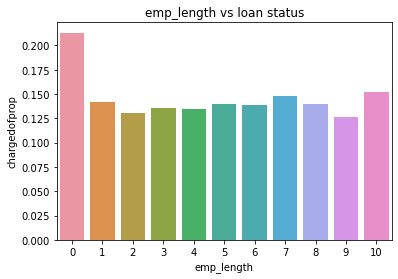

In [94]:
# employee length Vs charged off
employee_len_to_chargedoff=loan.groupby(['emp_length','loan_status'])
employee_len_to_chargedoff=employee_len_to_chargedoff.loan_status.count()
employee_len_to_chargedoff=employee_len_to_chargedoff.unstack()
employee_len_to_chargedoff=employee_len_to_chargedoff.reset_index()
employee_len_to_chargedoff['chargedofprop']=employee_len_to_chargedoff['Charged Off']/(employee_len_to_chargedoff['Charged Off']+employee_len_to_chargedoff['Current']+employee_len_to_chargedoff['Fully Paid'])
#now lets plot a bar graph chargedofprop to emp_length
plt.title("emp_length vs loan status")
sns.barplot(x='emp_length',y='chargedofprop',data=employee_len_to_chargedoff)
plt.show()

###observations:
Employees with < 1 year of experience are mostly the charged off ones.
Rest of the experence is more or less in same state.

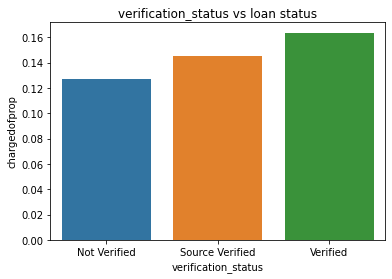

In [95]:
# verification status Vs charged off
verification_status_to_chargedoff=loan.groupby(['verification_status','loan_status'])
verification_status_to_chargedoff=verification_status_to_chargedoff.loan_status.count()
verification_status_to_chargedoff=verification_status_to_chargedoff.unstack()
verification_status_to_chargedoff=verification_status_to_chargedoff.reset_index()
verification_status_to_chargedoff['chargedofprop']=verification_status_to_chargedoff['Charged Off']/(verification_status_to_chargedoff['Charged Off']+verification_status_to_chargedoff['Current']+verification_status_to_chargedoff['Fully Paid'])
#now lets plot a bar graph chargedofprop to verification_status
plt.title("verification_status vs loan status")
sns.barplot(x='verification_status',y='chargedofprop',data=verification_status_to_chargedoff)
plt.show()

###observations:
Not any major differences as difference between highest and lowest is 0.2%

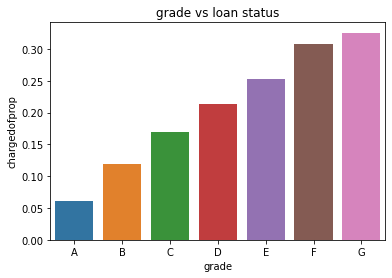

In [96]:
# grades and sub grades vs charged off
grades_to_chargedoff=loan.groupby(['grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grades_to_chargedoff['chargedofprop']=grades_to_chargedoff['Charged Off']/(grades_to_chargedoff['Charged Off']+grades_to_chargedoff['Current']+grades_to_chargedoff['Fully Paid'])
#now lets plot a bar graph chargedofprop to grade
plt.title("grade vs loan status")
sns.barplot(x='grade',y='chargedofprop',data=grades_to_chargedoff)
plt.show()

###Observations---
G and F groups are the most likely charged off ones.
People in A group are less charged off.
Increasing in grade the chances of getting charged off also increases.

In [97]:
#lets have a look at the loan info which columns we can consider still
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38525 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       38525 non-null  int64   
 1   loan_amnt                38525 non-null  int64   
 2   term                     38525 non-null  object  
 3   int_rate                 38525 non-null  float64 
 4   installment              38525 non-null  float64 
 5   grade                    38525 non-null  object  
 6   sub_grade                38525 non-null  object  
 7   emp_length               38525 non-null  int64   
 8   home_ownership           38525 non-null  object  
 9   annual_inc               38525 non-null  float64 
 10  verification_status      38525 non-null  object  
 11  issue_d                  38525 non-null  object  
 12  loan_status              38525 non-null  object  
 13  purpose                  38525 non-null  object  
 14  title 

### Derived Column
Year

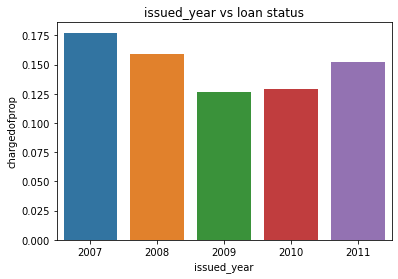

In [98]:
#Lets see for which year the loans given have highest charged off
loan['issued_year']=(pd.to_datetime(loan.issue_d, format='%b-%y')).dt.year
years_to_chargedoff=loan.groupby(['issued_year','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
years_to_chargedoff['chargedofprop']=years_to_chargedoff['Charged Off']/(years_to_chargedoff['Charged Off']+years_to_chargedoff['Current']+years_to_chargedoff['Fully Paid'])
#now lets plot a bar graph chargedofprop to issued_year
plt.title("issued_year vs loan status")
sns.barplot(x='issued_year',y='chargedofprop',data=years_to_chargedoff)
plt.show()

###Observations-
Loans given in year 2009 have the least charged off. Though total number loans given in 2007 to 2010 are very less compared to 2011.
So year doesnt add anything to the charged off status.

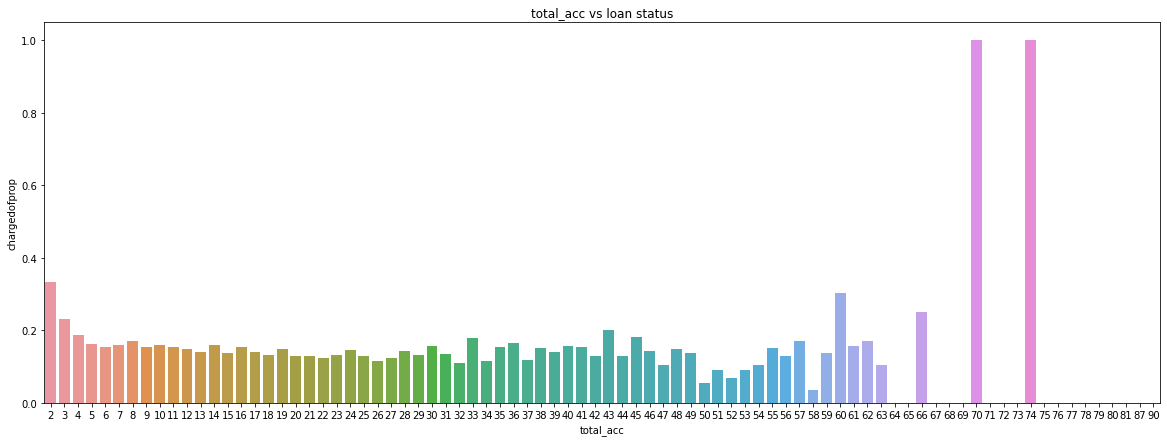

In [99]:
#Lets see for which year the loans given have highest charged off
plt.figure(figsize=[20,7])
tot_creditlines_to_chargedoff=loan.groupby(['total_acc','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
tot_creditlines_to_chargedoff['chargedofprop']=tot_creditlines_to_chargedoff['Charged Off']/(tot_creditlines_to_chargedoff['Charged Off']+tot_creditlines_to_chargedoff['Current']+tot_creditlines_to_chargedoff['Fully Paid'])
#now lets plot a bar graph chargedofprop to total_acc
plt.title("total_acc vs loan status")
sns.barplot(x='total_acc',y='chargedofprop',data=tot_creditlines_to_chargedoff)
plt.show()

###Observations-
Borrowers with high credit lines are more likely to get charged off.

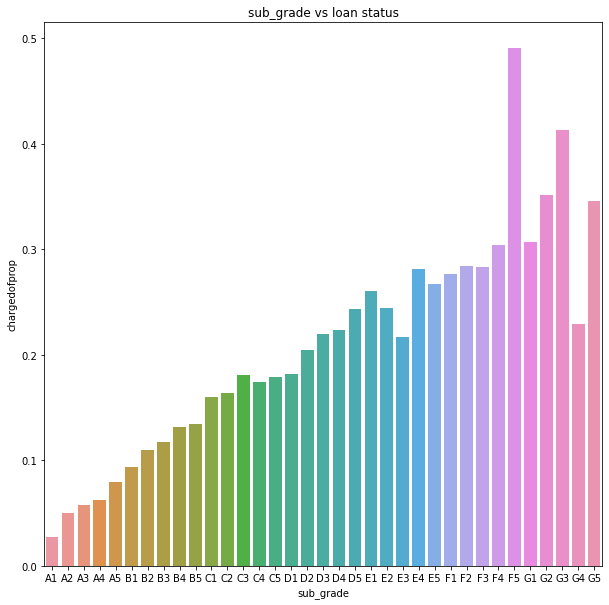

In [100]:
# sub grades vs charged off
plt.figure(figsize=[10,10])
subgrades_to_chargedoff=loan.groupby(['sub_grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
subgrades_to_chargedoff['chargedofprop']=subgrades_to_chargedoff['Charged Off']/(subgrades_to_chargedoff['Charged Off']+subgrades_to_chargedoff['Current']+subgrades_to_chargedoff['Fully Paid'])
#now lets plot a bar graph chargedofprop to sub_grade
plt.title("sub_grade vs loan status")
sns.barplot(x='sub_grade',y='chargedofprop',data=subgrades_to_chargedoff)
plt.show()

###observations:
sub groups under A have very less chances of charged off.

sub groups under F and G have very high chances of charged off with F5 and G3 being the higly likely.

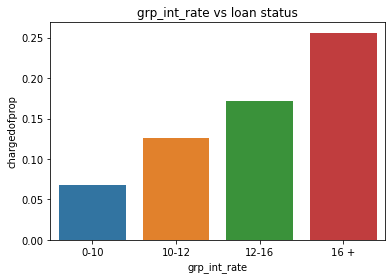

In [101]:
#we can analyse interest rate vs charged off
loan['grp_int_rate'] = pd.cut(loan['int_rate'], [0, 10, 12, 16, 20], labels=['0-10', '10-12', '12-16', '16 +'])
int_rate_to_chargedoff=loan.groupby(['grp_int_rate','loan_status'])
int_rate_to_chargedoff=int_rate_to_chargedoff.loan_status.count()
int_rate_to_chargedoff=int_rate_to_chargedoff.unstack()
int_rate_to_chargedoff=int_rate_to_chargedoff.reset_index()
int_rate_to_chargedoff['chargedofprop']=int_rate_to_chargedoff['Charged Off']/(int_rate_to_chargedoff['Charged Off']+int_rate_to_chargedoff['Current']+int_rate_to_chargedoff['Fully Paid'])
#now lets plot a bar graph chargedofprop to grp_int_rate
plt.title("grp_int_rate vs loan status")
sns.barplot(x='grp_int_rate',y='chargedofprop',data=int_rate_to_chargedoff)
plt.show()

###Observations
People with high interest rate are the ones charged off.
Less interest rate the charged off rate also decreases. 

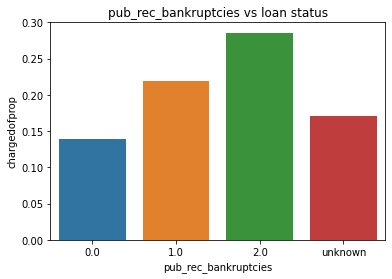

In [102]:
#we can analyse pub_rec_bankruptcies  vs charged off
bankrupt_to_chargedoff=loan.groupby(['pub_rec_bankruptcies','loan_status'])
bankrupt_to_chargedoff=bankrupt_to_chargedoff.loan_status.count()
bankrupt_to_chargedoff=bankrupt_to_chargedoff.unstack().fillna(0)
bankrupt_to_chargedoff=bankrupt_to_chargedoff.reset_index()
bankrupt_to_chargedoff['chargedofprop']=bankrupt_to_chargedoff['Charged Off']/(bankrupt_to_chargedoff['Charged Off']+bankrupt_to_chargedoff['Current']+bankrupt_to_chargedoff['Fully Paid'])
#now lets plot a bar graph chargedofprop to pub_rec_bankruptcies
plt.title("pub_rec_bankruptcies vs loan status")
sns.barplot(x='pub_rec_bankruptcies',y='chargedofprop',data=bankrupt_to_chargedoff)
plt.show()

###Observation-
Unknown is the column for which we don't have any information aboutthe borrower.
With this we can conclude that those who have defaulted before will more like be defaulters again.

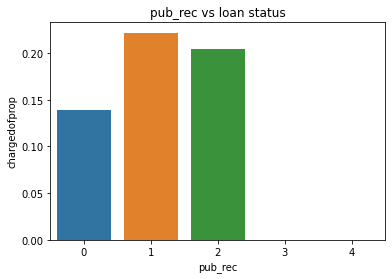

In [103]:
#we can analyse pub_rec  vs charged off
pub_rec_to_chargedoff=loan.groupby(['pub_rec','loan_status'])
pub_rec_to_chargedoff=pub_rec_to_chargedoff.loan_status.count()
pub_rec_to_chargedoff=pub_rec_to_chargedoff.unstack().fillna(0)
pub_rec_to_chargedoff=pub_rec_to_chargedoff.reset_index()
pub_rec_to_chargedoff['chargedofprop']=pub_rec_to_chargedoff['Charged Off']/(pub_rec_to_chargedoff['Charged Off']+pub_rec_to_chargedoff['Current']+pub_rec_to_chargedoff['Fully Paid'])
#now lets plot a bar graph chargedofprop to pub_rec
plt.title("pub_rec vs loan status")
sns.barplot(x='pub_rec',y='chargedofprop',data=pub_rec_to_chargedoff)
plt.show()

###Observations-
Number of derogatory public records.

It is not clear as burrowers with 3 and 4 have no charged off where 1 has more number of charged off than 2.
